In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Разберемся с распределением количества показов и кликов. 
# Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).

In [3]:
# считаем датасет. У нас в архиве 2 файла
ads_data = pd.read_csv('C:/Users/Евгений/Downloads/Аналитик_1/6/Задания_6/Минипроект/ads_data.csv')
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [4]:
ads_data.shape

(1000000, 11)

In [5]:
ads_data.dtypes

date                      object
time                      object
event                     object
platform                  object
ad_id                      int64
client_union_id            int64
campaign_union_id          int64
ad_cost_type              object
ad_cost                  float64
has_video                  int64
target_audience_count      int64
dtype: object

In [6]:
ads_data.dtypes.value_counts()

int64      5
object     5
float64    1
dtype: int64

In [7]:
ads_client = pd.read_csv('C:/Users/Евгений/Downloads/Аналитик_1/6/Задания_6/Минипроект/ads_clients_data.csv')
ads_client.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [8]:
ads_client.shape

(122078, 4)

In [9]:
ads_client.dtypes

date               object
client_union_id     int64
community_id        int64
create_date        object
dtype: object

In [10]:
ads_client.dtypes.value_counts()

int64     2
object    2
dtype: int64

In [11]:
number_per_ad_per_event = (
    ads_data
    .groupby(['ad_id', 'event'], as_index=False)
    .agg({'time': 'count'})
    .rename(columns={'time': 'event_number'})
)

In [12]:
number_per_ad_per_event.pivot(index='ad_id',columns='event', values='event_number')

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,NaN,35.0
2132,1.0,58.0
2468,NaN,39.0
2494,1.0,324.0
2604,4.0,402.0
2709,14.0,2628.0


In [13]:
pivot_per_ad_events = number_per_ad_per_event.pivot(index='ad_id',columns='event', values='event_number').fillna(0)

In [14]:
pivot_per_ad_events.mean().round()

event
click    113.0
view     923.0
dtype: float64

In [15]:
# другой способ без pivot

In [16]:
number_per_ad_per_event.groupby('event').agg({'event_number':'sum'})

,event_number
event,
click,109178
view,890822


In [17]:
number_per_ad_per_event.ad_id.nunique()

965

In [18]:
number_per_ad_per_event.groupby('event').agg({'event_number':'sum'}).div(number_per_ad_per_event.ad_id.nunique()).round()

,event_number
event,
click,113.0
view,923.0


In [19]:
number_per_ad_per_event \
.query('event == "view"') \
.query('event_number == 101') # при постр графика y будет равен 5 по числу набл.

,ad_id,event,event_number
1,2,view,101
481,35522,view,101
1154,108133,view,101
1283,114885,view,101
1431,120510,view,101


In [20]:
views_per_ad = number_per_ad_per_event \
               .query('event == "view"')
views_per_ad.head()

,ad_id,event,event_number
1,2,view,101
3,3,view,184
5,1902,view,41
6,2064,view,35
8,2132,view,58


In [21]:
import seaborn as sns

<AxesSubplot:xlabel='event_number'>

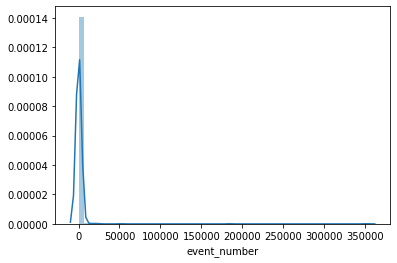

In [22]:
sns.distplot(views_per_ad.event_number)

In [23]:
# т.к.попловин значений около 84 (медиана) и меньше, лучше использ логарифм шкалу

In [24]:
np.log(views_per_ad.event_number).head()

1    4.615121
3    5.214936
5    3.713572
6    3.555348
8    4.060443
Name: event_number, dtype: float64

In [25]:
views_per_ad['log_views'] = np.log(views_per_ad.event_number)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
sns.set(
    font_scale=2,
    style='whitegrid',
    rc={'figure.figsize': (20,7)})

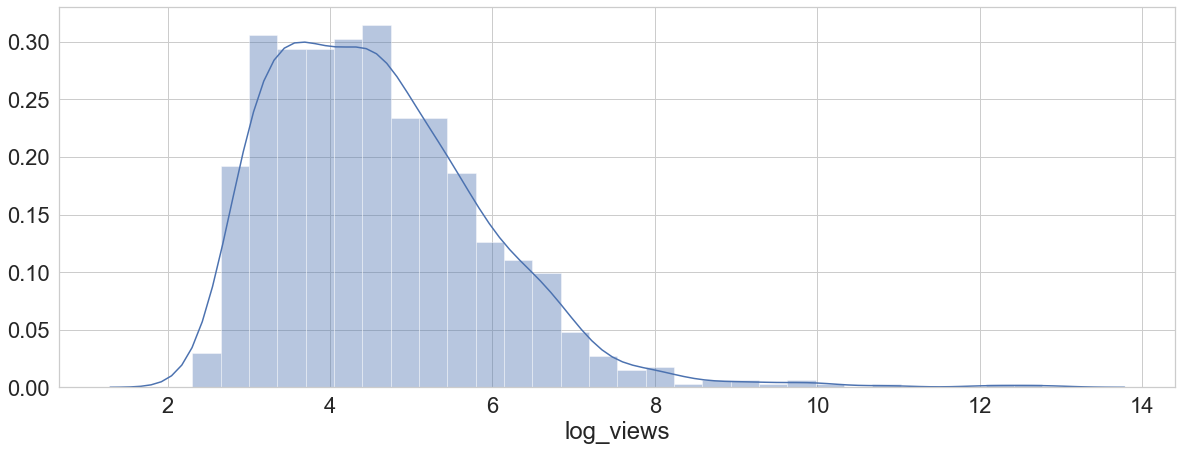

In [27]:
sns.distplot(views_per_ad.log_views);

In [28]:
#А теперь давайте посчитаем скользящее среднее показов с окном 2. 
# Какое значение скользящего среднего получим за 6 апреля 2019 года 
# (ответ округлите до целых)?

In [29]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [30]:
ads_data.query('event == "view"') \
    .pivot_table(index='ad_id', columns='date', values='time', aggfunc='count').head()

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN


In [31]:
ads_view_per_data = ads_data \
                    .query('event == "view"') \
                    .pivot_table(index='ad_id', 
                                 columns='date', 
                                 values='time', 
                                 aggfunc='count')

In [32]:
ads_view_per_data.mean()

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [33]:
ads_view_per_data.mean().rolling(2).mean()

date
2019-04-01           NaN
2019-04-02    146.134626
2019-04-03    150.869880
2019-04-04    419.927249
2019-04-05    797.505699
2019-04-06    598.116202
dtype: float64

In [34]:
mean_views = ads_view_per_data.mean()

In [35]:
rolling_views = mean_views.rolling(2).mean()

In [36]:
rolling_views

date
2019-04-01           NaN
2019-04-02    146.134626
2019-04-03    150.869880
2019-04-04    419.927249
2019-04-05    797.505699
2019-04-06    598.116202
dtype: float64

In [37]:
rolling_views['2019-04-06'].round()

598.0

In [38]:
# Скользящее среднее часто используется для поиска аномалий в данных. 
# Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов. 
# В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? 
# Дни, в которых скользящее среднее равно NaN, не учитываем. 

In [39]:
# скользящее среднее может вычислить выброс, это важно для очистки данных

<AxesSubplot:>

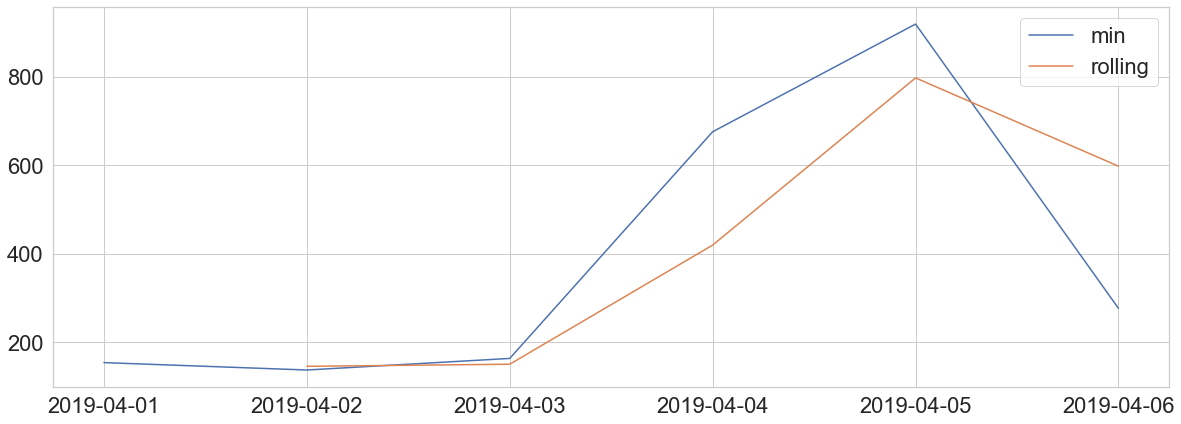

In [40]:
sns.lineplot(data=mean_views, label='min')
sns.lineplot(data=rolling_views, label='rolling')

In [41]:
abs(mean_views - rolling_views)

date
2019-04-01           NaN
2019-04-02      8.347644
2019-04-03     13.082898
2019-04-04    255.974471
2019-04-05    121.603979
2019-04-06    320.993475
dtype: float64

In [42]:
(mean_views - rolling_views).abs().idxmax()

'2019-04-06'

In [43]:
mean_views.subtract(rolling_views).abs().idxmax()

'2019-04-06'

In [44]:
# *Напишите функцию, которая найдет проблемное объявление (с наибольшим/наименишим количеством показов) в день, 
# в который была замечена самая большая по модулю аномалия. 

In [45]:
ads_view_per_data.head()

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN


In [46]:
ads_view_per_data['2019-04-06'].max(), ads_view_per_data['2019-04-06'].min()

(48991.0, 1.0)

In [47]:
anomaly_day = mean_views.subtract(rolling_views).abs().idxmax()
anomaly_day

'2019-04-06'

In [48]:
mean_views.subtract(rolling_views)[anomaly_day]

-320.9934750733138

In [49]:
difference_value = mean_views.subtract(rolling_views)[anomaly_day]
if difference_value <= 0:
    # find max
    anonaly_ad = ads_view_per_data[anomaly_day].idxmax()
else:
    # find min
    anonaly_ad = ads_view_per_data[anomaly_day].idxmin()
anonaly_ad

112583

In [50]:
ads_view_per_data.loc[anonaly_ad]

date
2019-04-01         NaN
2019-04-02         NaN
2019-04-03         NaN
2019-04-04         NaN
2019-04-05    302811.0
2019-04-06     48991.0
Name: 112583, dtype: float64

In [51]:
def find_anomaly_id(ad_view_per_day_per_ad):
    # find anomaly day
    mean_views = ad_view_per_day_per_ad.mean()
    anomaly_day = mean_views.subtract(rolling_views).abs().idxmax()
    # find sign
    difference_value = mean_views.subtract(rolling_views)[anomaly_day]
    if difference_value <= 0:
    # find max
        anomaly_ad = ad_view_per_day_per_ad[anomaly_day].idxmax()
    else:
    # find min
        anomaly_ad = ad_view_per_day_per_ad[anomaly_day].idxmin()
    return anonaly_ad
    # find id

In [52]:
find_anomaly_id(ads_view_per_data)

112583

In [53]:
# *Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания 
# рекламного клиента и первым запуском рекламного объявления этим клиентом.

In [54]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [55]:
ads_client.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [56]:
full_data = ads_data.merge(ads_client.drop(columns=['date', 'community_id']))
full_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04


In [57]:
full_data[['date', 'create_date']] = full_data[['date', 'create_date']].apply(pd.to_datetime)
(
    full_data
    .groupby('client_union_id')
    .apply(lambda group: (group.date - group.create_date).min())
)

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
25        97 days
36       178 days
37        38 days
42        95 days
43       130 days
45       134 days
49       194 days
56       207 days
68       228 days
73        83 days
78       112 days
80       152 days
81        91 days
87        51 days
88       242 days
107       48 days
126      145 days
130      131 days
147      141 days
150       82 days
151      119 days
160      159 days
169       79 days
191       36 days
198       66 days
           ...   
120413   112 days
120415   231 days
120417   135 days
120687    82 days
120784   101 days
120793    43 days
120828   171 days
121006    36 days
121018   149 days
121023   130 days
121286    66 days
121288    97 days
121308   108 days
121343   125 days
121526    94 days
121584   154 days
121646   116 days
121745   102 days
121765   138 days
121818   143 days
121841   187 days
121893   202 days
121894   204 days
121940    55

In [58]:
(
    full_data
    .groupby('client_union_id')
    .apply(lambda group: (group.date - group.create_date).min())
    .mean()
)

Timedelta('124 days 09:04:43.532219')

In [59]:
# 124 дня

In [60]:
# *Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней.
# Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))

In [61]:
threshold = pd.to_timedelta(365, unit='d')
threshold

Timedelta('365 days 00:00:00')

In [62]:
creation_difference = (
    full_data
    .groupby('client_union_id')
    .apply(lambda group: (group.date - group.create_date).min())
)

In [63]:
creation_difference.loc[creation_difference < threshold]

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
25        97 days
36       178 days
37        38 days
42        95 days
43       130 days
45       134 days
49       194 days
56       207 days
68       228 days
73        83 days
78       112 days
80       152 days
81        91 days
87        51 days
88       242 days
107       48 days
126      145 days
130      131 days
147      141 days
150       82 days
151      119 days
160      159 days
169       79 days
191       36 days
198       66 days
           ...   
120413   112 days
120415   231 days
120417   135 days
120687    82 days
120784   101 days
120793    43 days
120828   171 days
121006    36 days
121018   149 days
121023   130 days
121286    66 days
121288    97 days
121308   108 days
121343   125 days
121526    94 days
121584   154 days
121646   116 days
121745   102 days
121765   138 days
121818   143 days
121841   187 days
121893   202 days
121894   204 days
121940    55

In [64]:
round(creation_difference.shape[0] / ads_client.client_union_id.nunique() * 100, 2)

0.69

In [65]:
# *Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. 
# Определите,сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).
# Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]

In [66]:
bins = pd.to_timedelta([0, 30, 90, 180, 365], unit='d')

In [67]:
pd.cut(creation_difference, bins=bins)

client_union_id
1          (90 days 00:00:00, 180 days 00:00:00]
9          (90 days 00:00:00, 180 days 00:00:00]
13          (30 days 00:00:00, 90 days 00:00:00]
16         (90 days 00:00:00, 180 days 00:00:00]
20          (30 days 00:00:00, 90 days 00:00:00]
25         (90 days 00:00:00, 180 days 00:00:00]
36         (90 days 00:00:00, 180 days 00:00:00]
37          (30 days 00:00:00, 90 days 00:00:00]
42         (90 days 00:00:00, 180 days 00:00:00]
43         (90 days 00:00:00, 180 days 00:00:00]
45         (90 days 00:00:00, 180 days 00:00:00]
49        (180 days 00:00:00, 365 days 00:00:00]
56        (180 days 00:00:00, 365 days 00:00:00]
68        (180 days 00:00:00, 365 days 00:00:00]
73          (30 days 00:00:00, 90 days 00:00:00]
78         (90 days 00:00:00, 180 days 00:00:00]
80         (90 days 00:00:00, 180 days 00:00:00]
81         (90 days 00:00:00, 180 days 00:00:00]
87          (30 days 00:00:00, 90 days 00:00:00]
88        (180 days 00:00:00, 365 days 00:00:00]
107 

In [68]:
pd.cut(creation_difference, bins=bins, labels=['0-30', '30-90', '90-180', '180-365']).value_counts()

90-180     396
30-90      263
180-365    168
0-30        11
dtype: int64

In [69]:
creation_difference_groups = pd.cut(creation_difference, 
                                    bins=bins, 
                                    labels=['0-30', '30-90', '90-180', '180-365']).value_counts()

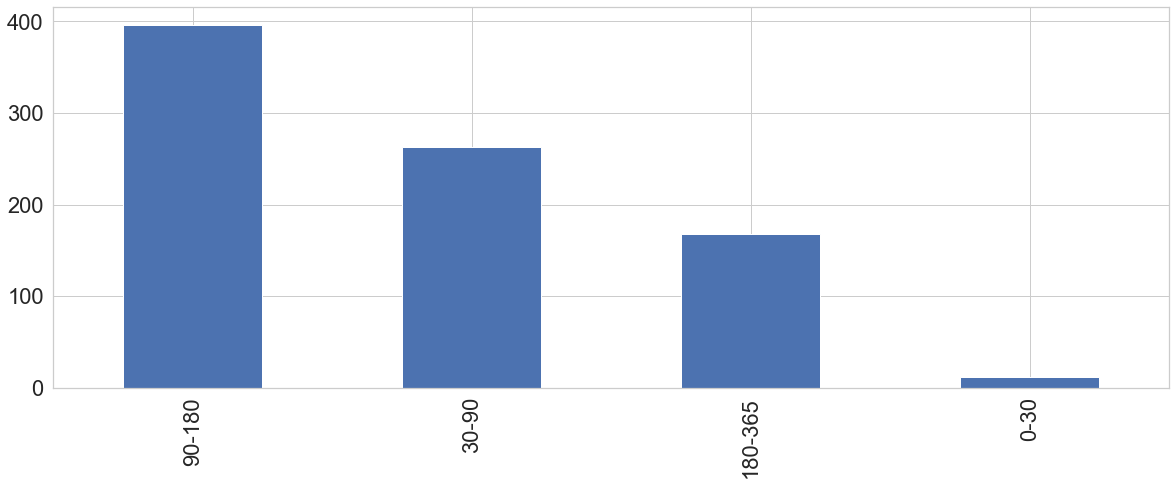

In [70]:
creation_difference_groups.plot(kind='bar');